In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import regex as re

In [122]:
MetCity = pd.read_csv('MetCityCleaned.csv', sep = ',', engine = 'python')
materials = pd.read_csv('Materials_freq.csv', sep = ',', engine = 'python')

In [123]:
med = list(materials['Medium'])

In [124]:
#Using TextBlob each item is classified using POS tagging to separate the methods from the materials
tags = []
for i in med:
    txt = TextBlob(i)
    tag = txt.tags
    tags.append(list(tag[-1]))
    
tagsPD = pd.DataFrame(tags)

In [125]:
#Joining the tag classifications with the materials dataframe
matTag = pd.merge(materials, tagsPD, left_index=True, right_index=True).drop(0, axis = 1)
matTag.columns = ['Medium', 'Frequency', 'Tag']
TG = list(tagsPD[1].unique())
matTag = matTag.set_index('Tag')

Go to https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b to understand the POS tags, basically verbs (VBG and VBN) constituted methods of artwork and nouns (NNS) constituted a material

In [126]:
#Below are the tags identified
TG

['VBG',
 'NN',
 'NNS',
 'VBN',
 'JJ',
 'IN',
 'RB',
 'CD',
 'VBD',
 'CC',
 'DT',
 'VB',
 'TO',
 'VBP',
 'VBZ',
 'JJR',
 'PRP$',
 'MD',
 'RBR',
 'WP']

# Artwork Method and Material Data

#### The code below matches the method/material tags with the MET dataset and creates columns indicating whether the artwork is made a certain way or of a certain material. This new dataframe is indexed by the Object ID and so can be referred back to the original dataset. Setting the data in this format prepares it for a clustering analysis or other kinds of analyses we wish to do.

In [127]:
#Extracting list of methods
#TextBlob misidentifed a few methods as material as these had to be returned to the method list

method = matTag.loc[['VBG', 'VBN']]
method = method.sort_values('Frequency', ascending = False)
method.loc['NN'] = ['woodcut', 1018]
method.loc['L'] = ['lithography',834 ]
method.loc['P'] = ['printing', 40]
method = method.set_index('Medium')

#Extracting list of methods
methods = method.loc[[
'etching',
 'engraving',
 'carved',
 'painted',
 'printed',
 'glazed',
 'pressed',
 'incised',
 'engraved',
 'molded',
 'embroidered',
 'gilded',
 'colored',
 'covered',
 'splashed',
 'knotted',
 'gilding',
 'etched',
 'coloring',
 'tinted',
 'mottled',
 'tooled',
 'chased',
 'polychromed',
 'brocaded',
 'punched',
 'pierced',
 'stippled',
 'ebonized',
 'drilled',
 'modeled',
 'plated',
 'mercerized',
 'stained',
 'decorated',
 'patinated',
 'illustrated',
 'enameled',
 'worked',
 'silvered',
 'attached',
 'marbled',
 'lacquered',
 'drawing',
 'fired',
 'hammered',
'cased',
 'embossed',
 'veneered',
 'plating',
 'chiseled',
 'handcolored',
 'folded',
 'japanned',
 'burnished',
 'spangled',
 'opacified',
 'lithographed',
 'frosted',
 'adhered',
 'lining',
 'baked',
 'beaded',
 'marvered',
 'historiated',
 'excised',
 'trimming',
 'photoengraving',
 'composed',
 'fabricated',
 'illuminated',
 'laminated',
 'braided',
 'liquified',
 'knitted',
 'marbleized',
 'flashed',
 'fused',
 'scratched',
 'reamed',
 'oxidized',
 'multicolored',
 'iridized',
 'handwriting',
 'caning',
 'woodcut',
 'lithography',
 'print', 'blown']]

#Extracting list of materials
mat = matTag.loc['NN']
mat = mat.set_index('Medium')
mat = mat.loc[[
    'wood',
 'earthenware',
 'silver',
 'glass',
 'stucco',
 'gold',
 'ink',
 'copper',
 'steel',
 'glaze',
 'préaud',
 'paper',
 'silk',
 'paint',
 'porcelain',
 'book',
 'mahogany',
 'watercolor',
 'ivory',
 'stonepaste',
 'lithograph',
 'metal',
 'cotton',
 'alloy',
 'enamel',
 'pine',
 'bronze',
 'bone',
 'iron',
 'leather',
 'pochoir',
 'linen',
 'wool',
 'maple',
 'gilt',
 'palm',
 'walnut',
 'limestone',
 'thread',
 'pewter',
 'poplar',
 'fiber',
 'marble']]


/Users/MedoYounes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [112]:
#This function takes in the MET data and the method/materials list and produces a dataframe indicating whether
#the artwork incoporates a certain method/material, this is show as either 1 (True) or 0 (False)

def mediumMatch(data, mediumItems):
    
    mediumItems = mediumItems.reset_index()
    tagList = list(mediumItems['Medium'])
    tagList.append('Object ID')      
    PD = pd.DataFrame(columns = tagList)
    PD['Object ID'] = data['Object ID'] 
    PD = PD.set_index('Object ID')
    medList = list(data['Medium'])
    IDList = list(data['Object ID'])
    tagList.remove('Object ID')
    
    for i, ID in zip(medList, IDList):
    
        match = []
        medium = str(i).lower()
    
        for j in tagList:
        
            if j in str(medium):
                match.append(1)
            if j not in str(medium): 
                match.append(0)
    
            if len(match) == len(PD.columns):
                PD.loc[ID] = match
                break
            
    print(PD.sum())
    return PD

## Final Output

In [ ]:
##WARNING - this is very time consuming
MethodsPD = mediumMatch(MetCity, methods)

In [149]:
MethodsPD

,etching,engraving,carved,painted,printed,glazed,pressed,incised,engraved,molded,...,reamed,oxidized,multicolored,iridized,handwriting,caning,woodcut,lithography,print,blown
Object ID,,,,,,,,,,,,,,,,,,,,,
33,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
34,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
41,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#WARNING - very time consuming
MaterialsPD = mediumMatch(MetCity, mat)

In [ ]:
MaterialsPD.to_csv('Materials.csv')
MethodsPD.to_csv('Methods.csv')
method.to_csv('methodList.csv')
mat.to_csv('materialList.csv')

## DBSCAN For Artwork Methods and Materials
#### One dataset will incorporate temporal data while the other won't

In [4]:
import scipy
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

In [5]:
#This function iteratively increases eps and sample size and prints their silhouette scores
#WARNING - very time consuming
#data - metData, sampStart - initial sample size, maxSamp - maxiumum sample size, sampStep - increment 
def findSilhouette(data, sampStart, maxSamp, sampStep):

    #This is how much the sample size will be changed
    for mSamp in range(sampStart, maxSamp, sampStep):
        for eps in np.arrange(0.1, 0.9, 0.1):
        
            dbscan = DBSAN(eps = eps, min_samples = mSamp)
            dbscan.fit(data)
            dbscan_labels = dbscan.labels_
            silh = metrics.silhouette_score(methCity, dbscan_labels)

        print("Sihouette: ", silh, ", eps: ", eps, ", Samp: ", mSamp)

In [6]:
#DBSCAN function, returns labels and prints silhouetee score and also number of artwork in each cluster
#Inputs are the met Data, eps = min distance between points, minSamples - min sample size
def dbscanFit(data, eps, minSamples):
    #DBSCAN for non Year Data
    dbscan = DBSCAN(eps = eps, min_samples = minSamples)
    dbscan.fit(data)
    dbscan_labels = dbscan.labels_
    silh = metrics.silhouette_score(data, dbscan_labels)
    print("Silhouette Score: ", silh)
    clusters = pd.DataFrame(dbscan_labels)
    clusters['Count'] = 1
    clusters.columns = ['Cluster ID', 'Count']
    print(clusters.groupby('Cluster ID').sum().head())
    
    return dbscan_labels

   

## METCity - DBSCAN for Methods - without year

In [123]:
#Generate Data set for clustering
methCity = pd.read_csv('Methods.csv').set_index('Object ID')
METCity = MetCity.set_index('Object ID')

In [124]:
#DBSCAN for non Year Data
methcityLabels = dbscanFit(methCity, 0.2, 2)

Silhouette Score:  0.9942552065740744
            Count
Cluster ID       
-1            122
 0            548
 1              2
 2          16009
 3             22


In [134]:
METCity['methodID'] = methcityLabels

In [135]:
MetID = METCity.set_index('methodID')
MetID.loc[50]

,Object Name,Title,City,Country,Object Begin Date,Object End Date,Medium,Credit Line,Classification,Link Resource,ClusterID
methodID,,,,,,,,,,,
50,Etching,The interior of the Oplotheca in Brook St. Bon...,possibly London,NaN,1816,1816,Etching and engraving,"Gift of Paul M. Herzog, 1923",Works on Paper-Prints,http://www.metmuseum.org/art/collection/search...,50
50,Book ; ornament and architecture,"Chinese Architecture, Civil and Ornamental [bo...",London,NaN,1759,1759,Illustrations: etching and engraving,"Harris Brisbane Dick Fund, 1930",Books|Ornament & Architecture,http://www.metmuseum.org/art/collection/search...,50
50,Book ; ornament and architecture,Gothic Architecture Decorated [bound with: Got...,London,NaN,1759,1759,Illustrations: etching and engraving,"Harris Brisbane Dick Fund, 1930",Books|Ornament & Architecture,http://www.metmuseum.org/art/collection/search...,50
50,Book,La Gerusalemme liberata,Venice,NaN,1745,1745,Etching and engraving,"Harris Brisbane Dick Fund, 1937",Books,http://www.metmuseum.org/art/collection/search...,50
50,Print,A Fireside Party,London,NaN,1830,1840,Engraving and etching,"Bequest of Anna Hyatt Huntington, 1974",Prints,http://www.metmuseum.org/art/collection/search...,50
50,Print,Death of Stags,London|Washington D.C.,NaN,1870,1880,"Etching, engraving, mezzotint and aquatint.","Bequest of Anna Hyatt Huntington, 1974",Prints,http://www.metmuseum.org/art/collection/search...,50
50,Print,Waiting For the Deer to Rise,London,NaN,1855,1855,"Etching, engraving and mezzotint.","Bequest of Anna Hyatt Huntington, 1974",Prints,http://www.metmuseum.org/art/collection/search...,50
50,Book,"Compositions from the Works, Days and Theogony...",London,NaN,1817,1817,Illustrations: stipple engraving and etching,"Purchase, Florance Waterbury Bequest, 1970",Books,http://www.metmuseum.org/art/collection/search...,50
50,Book ; Ornament and architecture,"The Cabinet Maker's Guide: Or, Rules and Instr...",London,NaN,1830,1830,Illustrations: etching and engraving,"A. Hyatt Mayor Purchase Fund, Marjorie Phelps ...",Books|Ornament & Architecture,http://www.metmuseum.org/art/collection/search...,50


## METCity Method DBSCAN with year

In [ ]:
#Join year data on object ID
methCityYr = methCity
methCityYr['Year'] = 0

for i in methCityYr.index:

    methCityYr.loc[i]['Year'] = METCity.loc[i]['Object Begin Date']

In [ ]:
#DBSCAN for Year data
dbscanFit(methCityYr, 0.1, 10)

## METCITY - DBSCAN for Materials - NO YEAR

In [76]:
materialsCity = pd.read_csv('Materials.csv').set_index('Object ID')


In [77]:
materialsCityLabels = dbscanFit(materialsCity, 0.1, 10)

Silhouette Score:  0.9182997735111815
            Count
Cluster ID       
-1           1732
 0           1439
 1            122
 2             63
 3            125


In [ ]:
#Check the clusters
MetID = MetCity
MetID['ClusterID'] = materialsCityLabels
MetID = MetID.set_index('ClusterID')
clusterAgg = pd.DataFrame(MetID.groupby(['ClusterID','Object Begin Date']).count().iloc[0:,0])
clusterAgg

<BarContainer object of 34 artists>

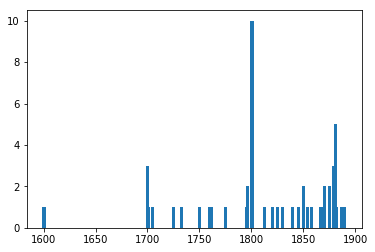

In [143]:
plt.bar(clusterAgg.loc[20].index, clusterAgg.loc[20]['Object ID'], width = 3)

## MET City DBSCAN for Materials - WITH YEAR

In [28]:
materialsCityYr = materialsCity
materialsCityYr['Year'] = 0
for ID in materialsCityYr.index:
    materialsCityYr.loc[ID]['Year'] = int(METCity.loc[ID]['Object Begin Date'])

In [32]:
materialsCityYr_Labels = dbscanFit(materialsCityYr, 0.1, 2)

Silhouette Score:  0.7459882051747735
            Count
Cluster ID       
-1           4107
 0              8
 1              2
 2             53
 3            174


In [729]:
MetID = MetCity
MetID['ClusterID'] = materialsCityYr_Labels
MetID = MetID.set_index('ClusterID')
MetID.loc[40]

,Object ID,Object Name,Title,City,Country,Object Begin Date,Object End Date,Medium,Credit Line,Classification,Link Resource,ClassID,Donation_Yr
ClusterID,,,,,,,,,,,,,
40,261,Armchair,Armchair,New York,United States,1850,1860,"Rosewood, ash","Gift of Mrs. Charles Reginald Leonard, in memo...",Furniture,http://www.metmuseum.org/art/collection/search...,1,1957
40,262,Armchair,Armchair,New York,United States,1850,1860,"Rosewood, ash","Gift of Mrs. Charles Reginald Leonard, in memo...",Furniture,http://www.metmuseum.org/art/collection/search...,1,1957
40,1624,Side Chair,Side Chair,New York,United States,1850,1860,"Rosewood, ash","Gift of Mrs. Charles Reginald Leonard, in memo...",Furniture,http://www.metmuseum.org/art/collection/search...,1,1957
40,1735,Side Chair,Side Chair,New York,United States,1850,1860,Rosewood,"Gift of Mrs. Charles Reginald Leonard, in memo...",Furniture,http://www.metmuseum.org/art/collection/search...,1,1957
40,1736,Side Chair,Side Chair,New York,United States,1850,1860,Rosewood,"Gift of Mrs. Charles Reginald Leonard, in memo...",Furniture,http://www.metmuseum.org/art/collection/search...,1,1957
40,3681,Firescreen,Firescreen,New York,United States,1850,1860,Rosewood,"Friends of the American Wing Fund, by exchange...",Furniture,http://www.metmuseum.org/art/collection/search...,1,1999
40,4021,Glassmaking mold,Glassmaking Mold,Sandwich,United States,1850,1900,Wood,"Rogers Fund, 1962",Natural Substances,http://www.metmuseum.org/art/collection/search...,0,1962
40,7586,Sofa,Sofa,New York,United States,1850,1860,Rosewood,"Purchase, Friends of the American Wing Fund an...",Furniture,http://www.metmuseum.org/art/collection/search...,1,1999
40,344819,Book,George's Adventures in the Country,Philadelphia|New York,NaN,1850,1850,Illustrations: woodcut,"Gift of Bella C. Landauer, 1925",Books,http://www.metmuseum.org/art/collection/search...,0,1925


## Extracting Donation Year through credit line column

In [8]:
MetCity = pd.read_csv('MetCityCleaned.csv', sep = ",", engine = "python")

In [9]:
#Create list of credit line objects and use Textblob tags to identify years under CD tag
creditLine = list(MetCity['Credit Line'])
tags = []
for i in creditLine:
    txt = TextBlob(str(i))y
    words = txt.words
    tag = txt.tags
    tags.append(list(tag))


In [13]:
#Filter out the data by the 'CD' tag and insert in the data frame
yearsPD = pd.DataFrame(columns= ['Object ID', 'Donation_Year'])
ID = MetCity['Object ID']
yearsPD['Object ID'] = ID
years = []

for items in tags:
    for tag in items:
        year = np.nan
        if 'CD' in tag:
            year = tag[0]
            
    
    years.append(year)
    
yearsPD['Donation_Year'] = years

In [14]:
#Using flashtext, extract years from the column where odd formatting is present
from flashtext.keyword import KeywordProcessor
import numpy as np
key_years = []
keyword_processor = KeywordProcessor()

for i in range(1000, 2019):
    keyword_processor.add_keyword(str(i))
    
for year in list(yearsPD['Donation_Year']):
    key_years.append(keyword_processor.extract_keywords(str(year)))

years_extract = []
for i in key_years:
    if len(i) > 0:
        years_extract.append(i[0])
    else : years_extract.append(np.nan)

yearsPD['Donation_Year'] = years_extract

### Calculate the volume of artwork from donated each country per year

In [15]:
MetCity['Donation_Yr'] = yearsPD['Donation_Year']
donationVol = MetCity.groupby('Donation_Yr').count().sort_values('Donation_Yr')
donationVol = pd.DataFrame(donationVol['Object ID'])
donationVol.columns = ['Volume']

In [43]:
CityDonVolume = pd.DataFrame(MetCity.set_index(['CityMatch', 'Donation_Yr']).groupby(['CityMatch', 'Donation_Yr']).count()['Object ID'])
CityDonVolume.to_csv('CityDonVolume.csv')

## Donation Volume for MetCountry 

In [12]:
MetCountry = pd.read_csv('MetCountry(clustered).csv', sep = ',', engine = 'python')

In [27]:
#Create list of credit line objects and use Textblob tags to identify years under CD tag
creditLine = list(MetCountry['Credit Line'])
tags = []
for i in creditLine:
    txt = TextBlob(str(i))
    words = txt.words
    tag = txt.tags
    tags.append(list(tag))


In [28]:
#Filter out the data by the 'CD' tag and insert in the data frame
yearsPD = pd.DataFrame(columns= ['Object ID', 'Donation_Year'])
ID = MetCountry['Object ID']
yearsPD['Object ID'] = ID
years = []

for items in tags:
    for tag in items:
        year = np.nan
        if 'CD' in tag:
            year = tag[0]
            
    
    years.append(year)
    
yearsPD['Donation_Year'] = years

In [29]:
#Using flashtext, extract years from the column where odd formatting is present
from flashtext.keyword import KeywordProcessor
import numpy as np
key_years = []
keyword_processor = KeywordProcessor()

for i in range(1000, 2019):
    keyword_processor.add_keyword(str(i))
    
for year in list(yearsPD['Donation_Year']):
    key_years.append(keyword_processor.extract_keywords(str(year)))

years_extract = []
for i in key_years:
    if len(i) > 0:
        years_extract.append(i[0])
    else : years_extract.append(np.nan)

yearsPD['Donation_Year'] = years_extract

In [30]:
#Calculate volume of artwork from each country per year
MetCountry['Donation_Yr'] = yearsPD['Donation_Year']
donationVol = MetCountry.groupby('Donation_Yr').count().sort_values('Donation_Yr')
donationVol = pd.DataFrame(donationVol['Object ID'])
donationVol.columns = ['Volume']

In [31]:
MetCountry.head()

,Unnamed: 0,Object ID,Object Name,Title,City,Country,Object Begin Date,Object End Date,Medium,Credit Line,Classification,Link Resource,CountryMatch,Donation_Yr
0,0,15,Coin,"Coin, 1/2 Real",NaN,Mexico,1665,1700,Silver,"Gift of Mrs. Russell Sage, 1916",Silver,http://www.metmuseum.org/art/collection/search/15,Mexico,1916
1,1,16,Peso,"Coin, 1/4 Peso",NaN,Mexico,1800,1900,Bronze or copper,"Gift of Mrs. Russell Sage, 1916",Metal,http://www.metmuseum.org/art/collection/search/16,Mexico,1916
2,2,17,Peso,"Coin, 1/4 Peso",NaN,Mexico,1867,1867,Bronze or copper,"Gift of Mrs. Russell Sage, 1916",Metal,http://www.metmuseum.org/art/collection/search/17,Mexico,1916
3,3,18,Peso,"Coin, 1/4 Peso",NaN,Mexico,1860,1860,Bronze or copper,"Gift of Mrs. Russell Sage, 1916",Metal,http://www.metmuseum.org/art/collection/search/18,Mexico,1916
4,4,19,Peso,"Coin, 1/4 Peso",NaN,Mexico,1859,1859,Bronze or copper,"Gift of Mrs. Russell Sage, 1916",Metal,http://www.metmuseum.org/art/collection/search/19,Mexico,1916


In [39]:
CountryDonVolume = pd.DataFrame(MetCountry.set_index(['CountryMatch', 'Donation_Yr']).groupby(['CountryMatch', 'Donation_Yr']).count()['Object ID'])
CountryDonVolume.to_csv('CountryDonVolume.csv')

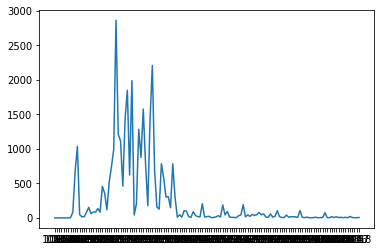

In [37]:
plt.plot(CountryDonVolume.loc['Egypt'].index, CountryDonVolume.loc['Egypt']['Object ID'])

# City Artwork Classification Data Extraction

In [4]:
#Create unique list of all the classifications

cityClass = list(MetCity['Classification'])

In [5]:
#USing regex, remove all unwanted characters such as - / ?
#Using texblob to extract unique words and append to a list, take out only unique values
classWords = []
for Class in cityClass:
    charRm = re.sub(r"\W", " ", str(Class), flags = re.I)
    txt = TextBlob(charRm)
    words = list(txt.words)
    for i in words:
        classWords.append(i)
    
#classWords = set(classWords)

In [6]:
#classCount = cityClassess.reset_index().drop('Tag', axis = 1)
#classCount['count'] = 0
from collections import Counter
classCount = Counter(classWords)
classCount = pd.DataFrame.from_dict(classCount, orient = 'index').sort_values(0, ascending = False).reset_index()

#classCount = classCount[0:150]

In [8]:
classCount.to_csv('CityClassCount.csv')

In [47]:
#Using textblob, tag classification words, select only nouns/categorical words
cityTags = []
for Class in classCount['index']:
    txt = TextBlob(Class)
    noun = list(txt.noun_phrases)
    if len(noun) > 0:
        for i in noun: 
            txt = TextBlob(i)
            tag = txt.tags
            if "NN" in str(tag) or "NNS" in str(tag):
                cl = list(tag[-1])
                cityTags.append(cl)
              
cityClassess = pd.DataFrame(cityTags)
cityClassess.columns = ['Classification', 'Tag']
cityClassess = cityClassess.set_index('Classification')

In [43]:
cityClassess = ['metal', 'silver', 'glass','prints',
 'architecture',
 'ornament',
 'ceramics',
 'stucco',
 'textiles',
 'silver',
 'furniture',
 'sculpture',
 'wood',
 'coins',
 'aerophone',
 'codices',
 'chordophone',
 'ivories',
 'drawings',
 'metalwork',
 'bone',
 'jewelry',
 'armor',
 'lute',
 'paintings',
 'stone',
 'firearms',
 'paper',
 'enamels',
 'reed',
 'bark',
 'manuscripts',
 'implements',
 'tiles',
 'illuminations',
 'parts',
 'lip',
 'idiophone',
 'champlevé',
 'hole',
 'blow',
 'pistols',
 'rugs',
 'papyrus',
 'zither',
 'helmets',
 'albums',
 'portfolios',
 'instruments',
 'struck',
 'containers',
 'fete',
 'whistle',
 'flute',
 'natural substances',
 'accessories',
 'krisses',
 'membranophone',
 'ornaments',
 'guns',
 'weapons',
 'flintlock',
 'daggers',
 'costumes',
 'photographs',
 'wheellock',
 'basketry',
 'cloisonné',
 'periodicals',
 'woodwork',
 'shields',
 'negatives',
 'brass',
 'reproductions',
 'walrus',
 'archery',
 'gauntlets',
 'miscellany',
 'revolvers',
 'bits',
 'engravings',
 'powder',
 'horns',
 'harp',
 'percussion',
 'horse',
 'beads',
 'shaken',
 'bronze',
 'stirrups',
 'leg',
 'leather',
 'sword',
 'thigh',
 'brocade',
 'accessory',
 'spurs',
 'menswear',
 'tapestries',
 'knives',
 'frames',
 'basse',
 'iron',
 'installations',
 'crossbows',
 'blades',
 'womenswear',
 'panels',
 'porcelain',
 'saddles',
 'ephemera',
 'medals',
 'outerwear',
 'lead',
 'shell',
 'organ',
 'concussion',
 'shoulders',
 'pottery',
 'barkcloth',
 'seals',
 'plucked',
 'flasks',
 'miniature',
 'postcards',
 'portraits',
 'posters',
 'vessels',
 'forgeries',
 'primers',
 'miquelet',
 'knee',
 'backplates',
 'defenses',
 'colletins',
 'plaquettes',
 'arrows',
 'fresco',
 'dyed',
 'lacquer',
 'laces',
 'combination',
 'quivers',
 'banners',
 'brocades',
 'arrowheads',
 'snaphaunce',
 'ironwork',
 'translucent',
 'leatherwork',
 'buffes',
 'electrotype',
 'pewter',
 'cuirasses',
 'tassets',
 'greaves',
 'bow',
 'coat',
 'tsuba',
 'gourd',
 'archer',
 'plaster',
 'verre',
 'ronde',
 'bosse',
 'beadwork',
 'canvas',
 'friction',
 'velvets',
 'matchlock',
 'cannon',
 'ring',
 'hide',
 'materials',
 'faience',
 'electrophone',
 'garde',
 'fittings',
 'manuscript',
 'lyre',
 'collages',
 'fuchi',
 'manteau',
 'tin',
 'mosaics',
 'jasper',
 'agate',
 'reliefs',
 'gems',
 'steatites',
 'potin',
 'electrum',
 'horn',
 'alabaster',
 'ojime',
 'papier',
 'jade',
 'ostraca',
 'wax',
 'elbow',
 'child',
 'helmet',
 'crests',
 'trappings',
 'visors',
 'mâché',
 'kashira',
 'plates',
 'feathers',
 'buckles',
 'foot',
 'wear',
 'headwear',
 'chess',
 'sets',
 'kogai', 'equestrian', 'books', 'gaming pieces', 'miscellaneous', 'crystal', 'mail']

In [44]:
#Use text flash to generate keywords and extract from the classification column
from flashtext import KeywordProcessor
keywords_found = []
#class_keywords = list(cityClassess.index)
classData = list(MetCity['Classification'])

keyword_processor = KeywordProcessor()
for clasS in cityClassess:
    keyword_processor.add_keyword(str(clasS))
    
for clasS in classData:
    keywords_found.append(keyword_processor.extract_keywords(str(clasS)))
    
class_keywords = []
for key in keywords_found:
    if len(key) > 0:
        class_keywords.append(key[0].capitalize())
    else:
        class_keywords.append(key)

MetCity['Reference'] = class_keywords

In [45]:
c = 0
for i in keywords_found:
    if len(i) == 0:
        c = c+1
        
print(c)

376


# Analysis for Country Data

In [46]:
MetCountry = pd.read_csv('MetCountry.csv')
countryMedium = pd.read_csv('Materials_freq(country).csv')


FileNotFoundError: File b'MetCountry.csv' does not exist

In [119]:
#Classify Medium using textblob
tags = []
for i in countryMedium['Medium']:
    txt = TextBlob(i)
    tag = txt.tags
    tags.append(list(tag[-1]))
    
tagsPD = pd.DataFrame(tags)
tagsPD.columns = ['Medium', 'Tag']

In [120]:
#Extracting list of methods
#TextBlob misidentifed a few methods as material as these had to be returned to the method list
matTag = tagsPD.set_index('Tag')
method = matTag.loc[['VBG', 'VBN', 'RB', 'JJ']].reset_index().set_index('Medium')
#Extracting list of materials
mat = matTag.loc[['NN', 'NNS']].reset_index().set_index('Medium')

#mat = mat.set_index('Medium')
#method = method.sort_values('Frequency', ascending = False)

#method = method.set_index('Medium')

In [121]:
countryMeth =  method.loc[['coloring',
 'glazed',
 'painted',
 'carved',
 'pressed',
 'incised',
 'embroidered',
 'gilded',
 'hammered',
 'molded',
 'engraved',
 'printed',
 'knotted',
 'brocaded',
 'indurated',
 'woven',
 'unfired',
 'luster-painted',
 'unglazed',
 'free-blown',
 'tin-glazed',
 'parian','polychrome', 'champlevé']]

countryMat = mat.loc[[ 'ceramic','wood',
 'glass',
 'faience',
 'paint',
 'ink',
 'gold',
 'earthenware',
 'silver',
 'limestone',
 'pottery',
 'linen',
 'copper',
 'wool',
 'silk',
 'paper',
 'cotton',
 'metal',
 'steatite',
 'stone',
 'glaze',
 'bronze',
 'stucco',
 'brass',
 'watercolor',
 'porcelain',
 'pigment',
 'ivory',
 'tapestry',
 'stonepaste',
 'fiber',
 'alloy',
 'thread',
 'alabaster',
 'gilt',
 'travertine',
 'bone',
 'hair',
 'clay',
 'shell',
 'mud',
 'iron',
 'camelid',
 'mahogany',
 'palm',
 'marble',
 'leather',
 'flint',
 'tempera',
 'pile',
 'carnelian',
 'pine',
 'enamel',
 'yellow',
 'graphite',
 'bamboo',
 'maple',
 'weft',
 'sago',
 'skin',
 'papyrus',
 'fragment',
 'plaster',
 'parchment',
 'oak',
 'cloth',
 'lead',
 'hide',
 'leaf',
 'poplar',
 'spathe',
 'pewter',
 'ebony',
 'amethyst',
 'lacy',
 'raffia',
 'gesso',
 'walnut',
 'mosaic',
 'wire',
 'lapis',
 'cord',
 'mortar',
 'beads',
 'feathers']]

/Users/MedoYounes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/Users/MedoYounes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [122]:
countryMethPD = mediumMatch(MetCountry, countryMeth)

coloring           236
glazed            3211
painted           2935
carved            2321
pressed           1000
incised            938
embroidered        835
gilded             608
hammered           513
molded             691
engraved           342
printed            599
knotted            301
brocaded           294
indurated          260
woven              331
unfired            468
luster-painted     383
unglazed           307
free-blown         284
tin-glazed         238
parian             229
polychrome         663
champlevé          203
dtype: int64


In [128]:
countryMethPD.to_csv('countryMethodClustering.csv')

## DBSCAN for country methods 

In [123]:
countryMethLabels = dbscanFit(countryMethPD, 0.1, 10)

Silhouette Score:  0.9963510392112517
            Count
Cluster ID       
-1            189
 0          62127
 1            983
 2            229
 3            239


In [129]:
MetCountry['MethodID'] = countryMethLabels

In [114]:
countryID = MetCountry
countryID['ClusterID'] = countryMethLabels
countryID = countryID.set_index('ClusterID')
countryID.loc[0]

NameError: name 'countryMethLabels' is not defined

In [130]:
countryMatPD = mediumMatch(MetCountry, countryMat)

ceramic        1757
wood           8246
glass          6258
faience        6214
paint          8644
ink            4472
gold           4040
earthenware    3976
silver         4016
limestone      3684
pottery        3553
linen          3246
copper         3171
wool           2690
silk           2520
paper          2538
cotton         2349
metal          2530
steatite       2204
stone          7449
glaze          5401
bronze         1827
stucco         1813
brass          1717
watercolor     1726
porcelain      1600
pigment        1619
ivory          1430
tapestry       1416
stonepaste     1347
               ... 
bamboo          485
maple           441
weft            432
sago            433
skin            468
papyrus         370
fragment        392
plaster         356
parchment       334
oak             301
cloth           408
lead            471
hide            323
leaf            276
poplar          269
spathe          261
pewter          256
ebony           249
amethyst        242


In [134]:
countryMatPD.to_csv('CountryMatCluster.csv')

In [131]:
countryMatLabels = dbscanFit(countryMatPD, 0.1, 10)

Silhouette Score:  0.8966540723674505
            Count
Cluster ID       
-1           5190
 0           2129
 1             22
 2           3224
 3           1733


In [137]:
MetCountry['MaterialID'] = countryMatLabels

In [138]:
MetCountry.head()

,Unnamed: 0,Object ID,Object Name,Title,City,Country,Object Begin Date,Object End Date,Medium,Credit Line,Classification,Link Resource,CountryMatch,ClusterID,MethodID,MaterialID
0,0,15,Coin,"Coin, 1/2 Real",NaN,Mexico,1665,1700,Silver,"Gift of Mrs. Russell Sage, 1916",Silver,http://www.metmuseum.org/art/collection/search/15,Mexico,0,0,0
1,1,16,Peso,"Coin, 1/4 Peso",NaN,Mexico,1800,1900,Bronze or copper,"Gift of Mrs. Russell Sage, 1916",Metal,http://www.metmuseum.org/art/collection/search/16,Mexico,1,0,1
2,2,17,Peso,"Coin, 1/4 Peso",NaN,Mexico,1867,1867,Bronze or copper,"Gift of Mrs. Russell Sage, 1916",Metal,http://www.metmuseum.org/art/collection/search/17,Mexico,1,0,1
3,3,18,Peso,"Coin, 1/4 Peso",NaN,Mexico,1860,1860,Bronze or copper,"Gift of Mrs. Russell Sage, 1916",Metal,http://www.metmuseum.org/art/collection/search/18,Mexico,1,0,1
4,4,19,Peso,"Coin, 1/4 Peso",NaN,Mexico,1859,1859,Bronze or copper,"Gift of Mrs. Russell Sage, 1916",Metal,http://www.metmuseum.org/art/collection/search/19,Mexico,1,0,1


In [24]:
countryID = MetCountry
countryID['ClusterID'] = countryMatLabels
countryID = countryID.set_index('ClusterID')
countryID.loc[90]

NameError: name 'countryMatLabels' is not defined

In [145]:
MetCounArtist = pd.read_csv('CountryCut(artists).csv')

In [147]:
MetCountry[['Artist Display Name','Artist Nationality','Artist Suffix','Artist Begin Date','Artist End Date']] = MetCounArtist[['Artist Display Name','Artist Nationality','Artist Suffix','Artist Begin Date','Artist End Date']]

In [7]:
MetCountry.to_csv('MetCountry(clustered).csv')

NameError: name 'MetCountry' is not defined

## Cluster Results - take an interesting cluster and present results

###  Materials Cluster 70 - artworks made of wood and shell

In [73]:
MetCountry.set_index('MaterialID').loc[70]['Medium'].unique()

array(['Wood, tortoiseshell', 'Wood, shell',
       'Wood, cowrie shells, seeds, latex or resin',
       'Wood, cowrie shells', 'Wood, cartridge shells',
       'Wood (Guaiacum sp.), shell', 'Wood (alder), snail shell opercula',
       'Wood, chambered nautilus shell', 'Wood, abalone shell inlay',
       'Wood (Trichilia gilgiana), cowrie shells',
       'Wood, sacrificial materials, eggshells',
       'Turtle shell and wood, 4 strings.', 'Wood and coconut shell.',
       'Wood, small tortoise shell', 'Coconut shell, wood',
       'Armadillo shell, wood, gut strings',
       'Coconut shell, wood, rattan, cane', 'Coconut shell, wood, rattan',
       'turtle shell, wood', 'Shell, wood',
       'Wood, tortoiseshell, other materials',
       'armadillo shell, wood, pearloid', 'wood, pearl, tortoise shell',
       'Wood, turtle shell, various', 'Wood, armadillo shell',
       'Spruce, rosewood, mother-of-pearl, tortoiseshell',
       'Wood, fruit shell (Oncoba Spinosa)',
       'Spruce, Bra

In [87]:
Cluster70_area = pd.DataFrame(MetCountry.set_index('MaterialID').loc[70].groupby('CountryMatch').count().sort_values('Object ID', ascending = False)['Object ID'])
Cluster70_area.head()

,Object ID
CountryMatch,
[],5
New Zealand,5
Congo,4
Papua New Guinea,3
Guinea,3


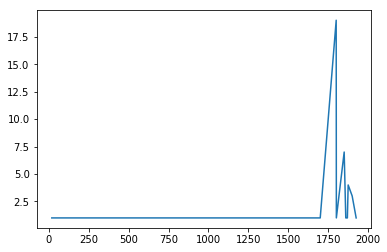

In [81]:
Cluster70_year = pd.DataFrame(MetCountry.set_index('MaterialID').loc[70].groupby('Object Begin Date').count()['Object ID'])
plt.plot(Cluster70_year.index, Cluster70_year['Object ID'])

In [79]:
Cluster70_class = pd.DataFrame(MetCountry.set_index('MaterialID').loc[70].groupby('Class_General').count()['Object ID'])
Cluster70_class.to_csv('Cluster70_class.csv')

## Methods Cluster 38 - Artworks that were carved and incised

In [113]:
MetCountry.set_index('MethodID').index.unique()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, -1, 12, 13, 14, 15,
            16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
            33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50],
           dtype='int64', name='MethodID')

In [109]:
MetCountry.set_index('MethodID').loc[38].groupby('CountryMatch').count()

,Unnamed: 0,Unnamed: 0.1,Object ID,Object Name,Title,City,Country,Object Begin Date,Object End Date,Medium,Credit Line,Classification,Link Resource,MaterialID,Class_General,Artist Display Name,Artist Nationality,Artist Suffix,Artist Begin Date,Artist End Date
CountryMatch,,,,,,,,,,,,,,,,,,,,
Egypt,10,10,10,9,10,5,10,10,10,10,10,10,10,10,10,0,0,0,0,0
India,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0
Iran,28,28,28,28,28,24,28,28,28,28,28,28,28,28,28,0,0,0,0,0
Israel,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0
Italy,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,0,0,0,0,0
Jordan,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0


In [110]:
MetCountry.set_index('MethodID').loc[38].groupby('Object Begin Date').count()

,Unnamed: 0,Unnamed: 0.1,Object ID,Object Name,Title,City,Country,Object End Date,Medium,Credit Line,Classification,Link Resource,CountryMatch,MaterialID,Class_General,Artist Display Name,Artist Nationality,Artist Suffix,Artist Begin Date,Artist End Date
Object Begin Date,,,,,,,,,,,,,,,,,,,,
-30,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,0,0,0
200,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0
400,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,0,0,0,0,0
600,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,0,0,0,0,0
700,6,6,6,5,6,5,6,6,6,6,6,6,6,6,6,0,0,0,0,0
775,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
800,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,0,0,0,0,0
850,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0
900,3,3,3,3,3,1,3,3,3,3,3,3,3,3,3,0,0,0,0,0


In [111]:
MetCountry.set_index('MethodID').loc[38].groupby('Class_General').count()

,Unnamed: 0,Unnamed: 0.1,Object ID,Object Name,Title,City,Country,Object Begin Date,Object End Date,Medium,Credit Line,Classification,Link Resource,CountryMatch,MaterialID,Artist Display Name,Artist Nationality,Artist Suffix,Artist Begin Date,Artist End Date
Class_General,,,,,,,,,,,,,,,,,,,,
Ceramics,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0
Gaming pieces,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0
Ivories,25,25,25,24,25,15,25,25,25,25,25,25,25,25,25,0,0,0,0,0
Jewelry,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0
Seals,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0
Stone,12,12,12,12,12,11,12,12,12,12,12,12,12,12,12,0,0,0,0,0
Woodwork,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0


# Country Artwork Classification Data Extraction

In [11]:
#Create unique list of all the classifications
countryClass = list(MetCountry['Classification'])

In [12]:
#USing regex, remove all unwanted characters such as - / ?
#Using texblob to extract unique words and append to a list, take out only unique values
classWords = []
for Class in countryClass:
    charRm = re.sub(r"\W", " ", str(Class), flags = re.I)
    txt = TextBlob(charRm)
    words = list(txt.words)
    for i in words:
        classWords.append(i)
    
#classWords = set(classWords)

In [13]:
#classCount = cityClassess.reset_index().drop('Tag', axis = 1)
#classCount['count'] = 0
from collections import Counter
classCount = Counter(classWords)
classCount = pd.DataFrame.from_dict(classCount, orient = 'index').sort_values(0, ascending = False).reset_index()

#classCount = classCount[0:150]

In [14]:
classCount.to_csv('CountryclassCount.csv')

In [15]:
#Using textblob, tag classification words, select only nouns/categorical words
CountryTags = []
for Class in classCount['index']:
    txt = TextBlob(Class)
    noun = list(txt.noun_phrases)
    if len(noun) > 0:
        for i in noun: 
            txt = TextBlob(i)
            tag = txt.tags
            if "NN" in str(tag) or "NNS" in str(tag):
                cl = list(tag[-1])
                CountryTags.append(cl)
              
CountryClasses = pd.DataFrame(CountryTags)
CountryClasses.columns = ['Classification', 'Tag']
CountryClasses = CountryClasses.set_index('Classification')

In [16]:
class_keywords = ['ceramics', 'glass',
 'textiles',
 'sculpture',
 'ornaments',
 'aerophone',
 'stucco',
 'containers',
 'furniture',
 'codices',
 'chordophone',
 'silver',
 'idiophone',
 'jewelry',
 'metalwork',
 'bone',
 'coins',
 'lute',
 'drawings',
 'paintings',
 'costumes',
 'ivories',
 'reed',
 'membranophone',
 'rugs',
 'hole',
 'blow',
 'lip',
 'flute',
 'whistle',
 'bark',
 'paper',
 'tiles',
 'zither',
 'instruments',
 'beads',
 'vessels',
 'shaken',
 'enamels',
 'manuscripts',
 'basketry',
 'illuminations',
 'papyrus',
 'champlevé',
 'natural substances',
 'photographs',
 'shell',
 'womenswear',
 'architecture',
 'accessory',
 'woodwork',
 'hide',
 'menswear',
 'accessories',
 'featherwork',
 'beadwork',
 'concussion',
 'harp',
 'barkcloth',
 'feathers',
 'seals',
 'reproductions',
 'brocade',
 'iron',
 'miscellany',
 'outerwear',
 'leather',
 'bronze',
 'brocades',
 'jade',
 'laces',
 'negatives',
 'gourd',
 'prints',
 'installations',
 'lacquer',
 'armor',
 'walrus',
 'panels',
 'secular',
 'bow',
 'leg',
 'foot',
 'frames',
 'tapestries',
 'basse',
 'postcards',
 'organ',
 'lyre',
 'fresco',
 'brass',
 'plaster',
 'cloisonné',
 'miniature',
 'pottery',
 'alabaster',
 'headwear',
 'parchment',
 'lead',
 'porcelain',
 'documents',
 'childrenswear',
 'friction',
 'mosaics',
 'ephemera',
 'leatherwork',
 'masks',
 'horn',
 'dyed',
 'mirliton',
 'sheet',
 'electrum',
 'collages',
 'canvas',
 'medals',
 'wax',
 'steatites',
 'flint',
 'waist',
 'pewter',
 'plaquettes',
 'verre',
 'translucent',
 'reliefs',
 'velvets',
 'bosse',
 'unisex',
 'mirrors',
 'ronde',
 'decorative',
 'sword',
 'shields',
 'graphics',
 'terracotta',
 'plates',
 'combination',
 'helmets',
 'sketches',
 'fittings',
 'pastels',
 'media',
 'marble',
 'wear',
 'chess',
 'sets',
 'trimmings',
 'furnishings',
 'frescoes',
 'papier',
 'mâché',
 'hematite',
 'potin',
 'actions',
 'sardonyx',
 'tin',
 'ostraca',
 'parts',
 'amber',
 'icons',
 'plastic',
 'electrophone', 'Main dress', 'Miscellaneous', 'Main dress', 'Gaming pieces', 'ivory', 'gold']

In [17]:
#Use text flash to generate keywords and extract from the classification column
from flashtext import KeywordProcessor
keywords_found = []
classData = list(MetCountry['Classification'])

keyword_processor = KeywordProcessor()
for clasS in class_keywords:
    keyword_processor.add_keyword(str(clasS))
    
for clasS in classData:
    keywords_found.append(keyword_processor.extract_keywords(str(clasS)))
    
country_keywords = []
for key in keywords_found:
    if len(key) > 0:
        country_keywords.append(key[0].capitalize())
    else:
        country_keywords.append(key)

#If length is zero append the original classification
for i,j in zip(range(len(country_keywords)), range(len(classData))):
    if len(country_keywords[i]) == 0:
        country_keywords[i] = classData[j] 
MetCountry['Class_General'] = country_keywords

## Clustering to identify significant periods of artwork trpes

In [8]:
MetCountry = pd.read_csv('MetCountry(clustered).csv')

In [9]:
MetCountry.groupby(['Class_General', 'Object Begin Date']).count()

Unnamed: 0  Unnamed: 0.1  Object ID  \
Class_General  Object Begin Date                                        
(not assigned) -205                        1             1          1   
               -100                        1             1          1   
                0                          4             4          4   
                100                        1             1          1   
                200                        1             1          1   
                300                        1             1          1   
                795                        1             1          1   
                1045                       1             1          1   
                1100                       1             1          1   
                1175                       1             1          1   
                1550                       1             1          1   
                1675                       1             1          1   
                1695                       1             1          1   
                1745                       4             4          4   
                1775                       3             3          3   
                1780                       1             1          1   
                1785                       2             2          2   
                1795                       4             4          4   
                1800                       1             1          1   
                1815                       3             3          3   
                1825                       3             3          3   
                1835                       5             5          5   
                1845                       6             6          6   
                1855                       6             6          6   
                1860                       2             2          2   
                1865                       4             4          4   
                1875                       3             3          3   
                1880                       2             2          2   
                1885                       4             4          4   
                1895                       6             6          6   
...                                      ...           ...        ...   
|               1790                       1             1          1   
                1791                       1             1          1   
                1792                       1             1          1   
                1794                       1             1          1   
                1795                       1             1          1   
                1802                       1             1          1   
                1812                       1             1          1   
                1813                       1             1          1   
                1815                       2             2          2   
                1818                       1             1          1   
                1829                       1             1          1   
                1876                       1             1          1   
                1900                       1             1          1   
                1934                       1             1          1   
||             -2030                       1             1          1   
               -1887                       1             1          1   
               -1850                       2             2          2   
               -1635                       2             2          2   
               -1550                       1             1          1   
               -1504                      26            26         26   
               -1492                       4             4          4   
               -1473                       3             3          3   
               -142

In [21]:
ClassClusters = MetCountry[['Object Begin Date', 'Class_General']]

In [23]:
list(ClassClusters['Class_General'].unique())

['Silver',
 'Metal',
 'Glass',
 'Furniture',
 'Ceramics',
 'Natural substances',
 'Architecture',
 'Jewelry',
 'Paintings',
 'Sculpture',
 'Drawings',
 'Prints',
 'Gold',
 'Frames',
 'Textiles',
 'Photographs',
 'Ephemera',
 'Manuscripts',
 'Outerwear',
 'Main dress',
 'Accessory',
 'Barkcloth',
 'Miscellaneous',
 'Feathers',
 'Hide',
 'Ornaments',
 'Wear',
 'Chess',
 'Woodwork',
 'Metal-Implements',
 'Containers',
 'Wood-Implements',
 'Bone',
 'Beads',
 'Stone-Implements',
 'Gourd',
 'Instruments',
 'Metalwork',
 'Bark',
 'Paper',
 'Wood-Architectural',
 'Wax',
 'Shell',
 'Basketry',
 'Plaster',
 'Jade',
 'Costumes',
 'Wood',
 'Reliefs',
 'Horn',
 'Vessels',
 'Stone',
 '(not assigned)',
 'Ivories',
 'Seals',
 'Leather',
 'Codices',
 'Reproductions',
 'Lacquer',
 'Armor',
 'Gaming pieces',
 'Coins',
 'Stucco',
 'Papier',
 'Collages',
 'Lapidary Work-Crystal',
 'Enamels',
 'Alabaster',
 'Hematite',
 'Leatherwork',
 'Flint',
 'Steatites',
 'Mosaics',
 'Sardonyx',
 'Installations',
 'seal

In [77]:
#Provide numerical values to each classification
classes = list(ClassClusters['Class_General'].unique())
classesDict = {}
classCode = []
for Class, n in zip(classes, range(len(classes))): classesDict.update({Class:n})
for ID in range(len(ClassClusters)):
    classCode.append(classesDict.get(ClassClusters.loc[ID]['Class_General']))
    
ClassClusters['Class_General'] = classCode

/Users/MedoYounes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
classYearCluster = dbscanFit(ClassClusters, 0.1, 20)

Silhouette Score:  0.6172604055868114
            Count
Cluster ID       
-1          14777
 0            117
 1            235
 2            200
 3             29


array([-1,  0, -1, ..., -1, -1, -1])